In [15]:
from BMX_Classes import *
from TimeOffsetFns import *
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import pickle 
import scipy.optimize as opt
from scipy.optimize import curve_fit


In [16]:
file2 = "/home/erk26/BMX/BMX_dicts/"+file_organizer['Thursday'][2][0]+"_offsets.txt"
file3 = "/home/erk26/BMX/BMX_dicts/"+file_organizer['Thursday'][3][0]+"_offsets.txt"
file4 = "/home/erk26/BMX/BMX_dicts/"+file_organizer['Thursday'][4][0]+"_offsets.txt"
file5 = "/home/erk26/BMX/BMX_dicts/"+file_organizer['Thursday'][5][0]+"_offsets.txt"
file6 = "/home/erk26/BMX/BMX_dicts/"+file_organizer['Thursday'][6][0]+"_offsets.txt"
file7 = "/home/erk26/BMX/BMX_dicts/"+file_organizer['Thursday'][7][0]+"_offsets.txt"
file8 = "/home/erk26/BMX/BMX_dicts/"+file_organizer['Thursday'][8][0]+"_offsets.txt"

files = [file2, file3, file4, file5, file6, file7, file8]

timedicts = {}
for i, file in enumerate(files):
    print('start '+file)
    with open(file, 'rb') as handle:
        timedicts[file_organizer['Thursday'][i+2][0]] = pickle.loads(handle.read())
    print('end '+file)


start /home/erk26/BMX/BMX_dicts/FLY342_offsets.txt
end /home/erk26/BMX/BMX_dicts/FLY342_offsets.txt
start /home/erk26/BMX/BMX_dicts/FLY343_offsets.txt
end /home/erk26/BMX/BMX_dicts/FLY343_offsets.txt
start /home/erk26/BMX/BMX_dicts/FLY344_offsets.txt
end /home/erk26/BMX/BMX_dicts/FLY344_offsets.txt
start /home/erk26/BMX/BMX_dicts/FLY347_offsets.txt
end /home/erk26/BMX/BMX_dicts/FLY347_offsets.txt
start /home/erk26/BMX/BMX_dicts/FLY349_offsets.txt
end /home/erk26/BMX/BMX_dicts/FLY349_offsets.txt
start /home/erk26/BMX/BMX_dicts/FLY351_offsets.txt
end /home/erk26/BMX/BMX_dicts/FLY351_offsets.txt
start /home/erk26/BMX/BMX_dicts/FLY352_offsets.txt
end /home/erk26/BMX/BMX_dicts/FLY352_offsets.txt


In [17]:
fits = {} 

for i, file in enumerate(files):
    print('start '+file)
    fits[file_organizer['Thursday'][i+2][0]] = get_fits_by_time(timedicts[file_organizer['Thursday'][i+2][0]])
    print('end '+file)

start /home/erk26/BMX/BMX_dicts/FLY342_offsets.txt
end /home/erk26/BMX/BMX_dicts/FLY342_offsets.txt
start /home/erk26/BMX/BMX_dicts/FLY343_offsets.txt
end /home/erk26/BMX/BMX_dicts/FLY343_offsets.txt
start /home/erk26/BMX/BMX_dicts/FLY344_offsets.txt
end /home/erk26/BMX/BMX_dicts/FLY344_offsets.txt
start /home/erk26/BMX/BMX_dicts/FLY347_offsets.txt
end /home/erk26/BMX/BMX_dicts/FLY347_offsets.txt
start /home/erk26/BMX/BMX_dicts/FLY349_offsets.txt
end /home/erk26/BMX/BMX_dicts/FLY349_offsets.txt
start /home/erk26/BMX/BMX_dicts/FLY351_offsets.txt
end /home/erk26/BMX/BMX_dicts/FLY351_offsets.txt
start /home/erk26/BMX/BMX_dicts/FLY352_offsets.txt
end /home/erk26/BMX/BMX_dicts/FLY352_offsets.txt


In [18]:
xs = np.linspace(-1.1,1.1,200)

def xsquaredfit(x, y0, x0, a, b):
    return y0 + a*(x-x0) + b*(x-x0)**2


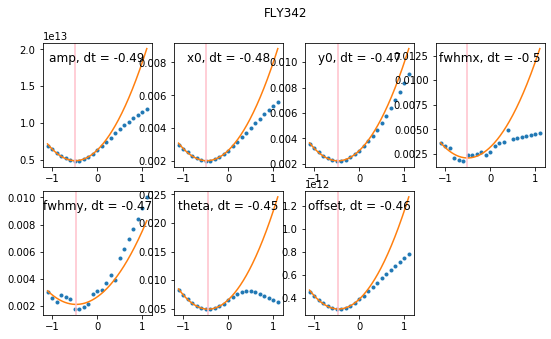

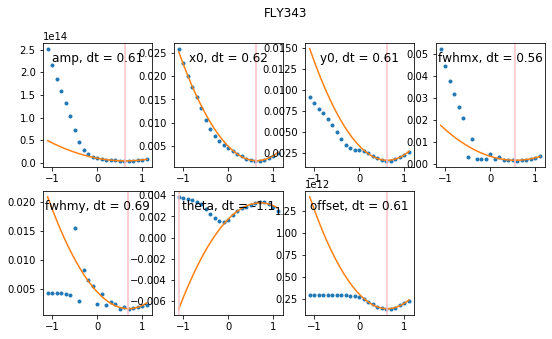

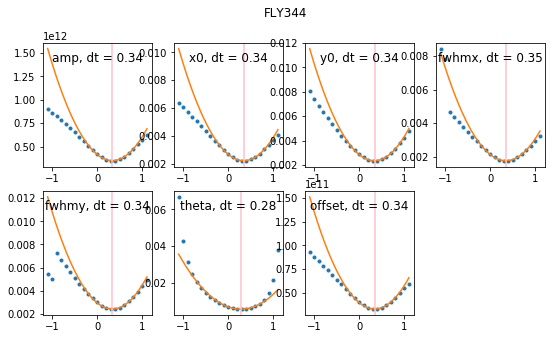

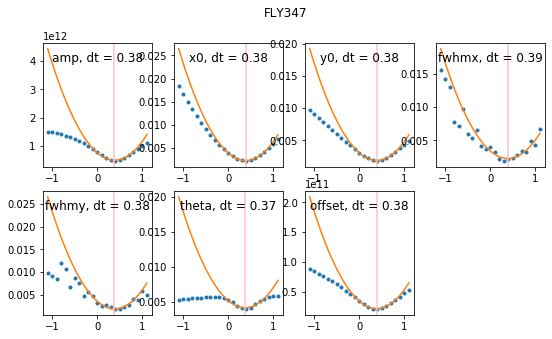

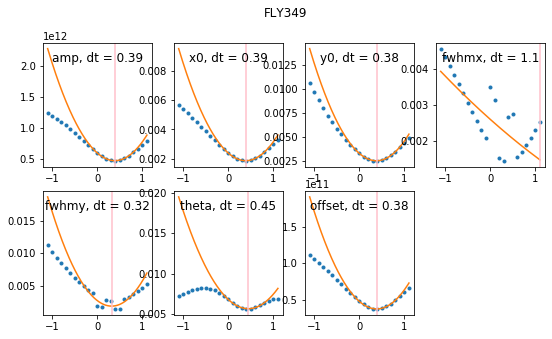

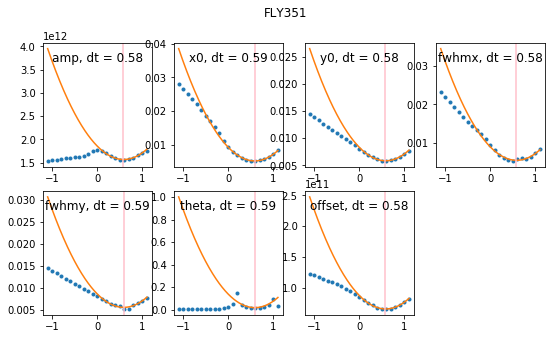

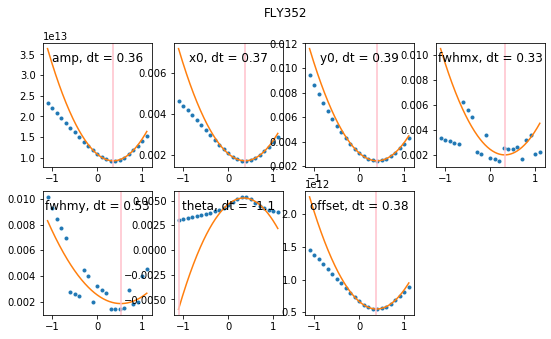

In [19]:
#you can see minimum offset in agreement bw parameters

pars = ['amp', 'x0', 'y0', 'fwhmx', 'fwhmy', 'theta', 'offset']

for key in timedicts.keys():
    fig = plt.figure(figsize = (9,5))
    counter = 1
    for param in pars:
        ax = fig.add_subplot(2,4,counter)
        ax.plot(list(timedicts[key].keys()),fits[key][1][param],'.')
        minindx = fits[key][1]['x0'].index(np.min(fits[key][1]['x0']))

        a = np.polyfit(list(timedicts[key].keys()),fits[key][1][param],2)
        popt, pcov = curve_fit(xsquaredfit,list(timedicts[key].keys())[minindx-5:minindx+5],\
                           fits[key][1][param][minindx-5:minindx+5], p0=(a[0],-0.5,a[1],a[2]))
        ax.plot(xs,xsquaredfit(xs,*popt))
        minfit = xs[list(xsquaredfit(xs,*popt)).index(np.min(xsquaredfit(xs,*popt)))]
        ax.axvline(minfit, color = 'pink')
        
        
        ax.set_title(param + ', dt = '+str(round(minfit,2)), y=0.8)
        counter+=1
    plt.suptitle(key)
    plt.show()

In [20]:
pars = ['amp', 'x0', 'y0', 'fwhmx', 'fwhmy', 'theta', 'offset']
minindxdict = {}
for key in timedicts.keys():
    for param in pars:
        minindx = fits[key][1]['x0'].index(np.min(fits[key][1]['x0']))
        minindxdict[key] = list(timedicts[key].keys())[minindx]


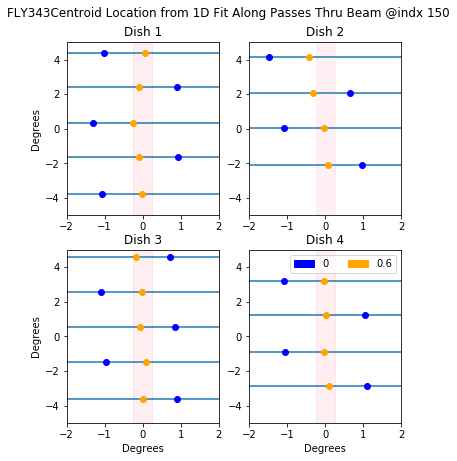

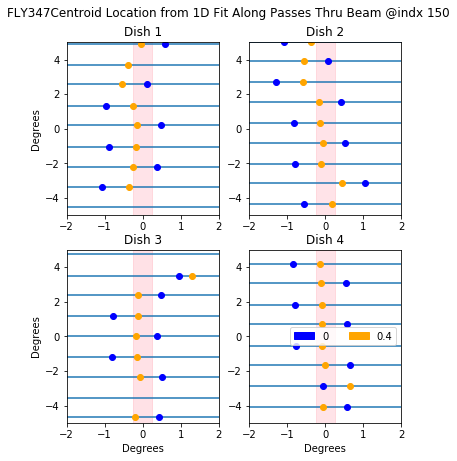

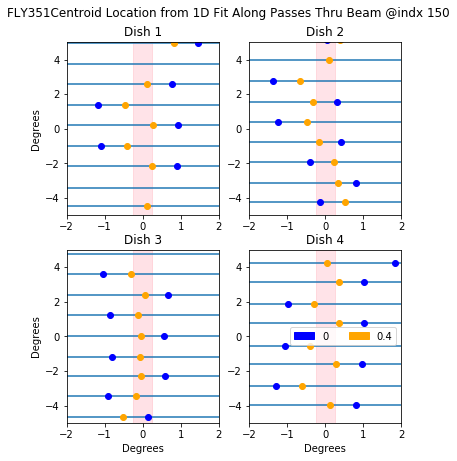

In [21]:
#beam centers from found from independent 1D cuts from 
#successive passes for flights with 0 offset, vs for flights with offset found from fit
#we expect the beam centers to be in line, the fact that it jumps back and forth is telling
#coord system is with respect to beam center for each dish and changes in each plot

plotcentroids_x2(timedicts, 'FLY343', [0,minindxdict['FLY343']],150)
plotcentroids_x2(timedicts, 'FLY347', [0,minindxdict['FLY347']],150)
plotcentroids_x2(timedicts, 'FLY351', [0,minindxdict['FLY347']],150)


In [22]:
file= '/home/erk26/BMX/BMX_dicts/fits_by_dish.txt'
with open(file, 'rb') as handle:
    timing_fits_dish = pickle.loads(handle.read())

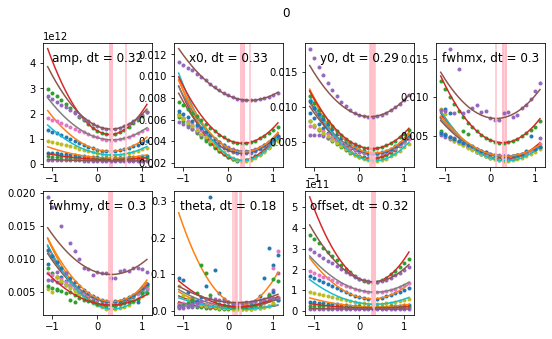

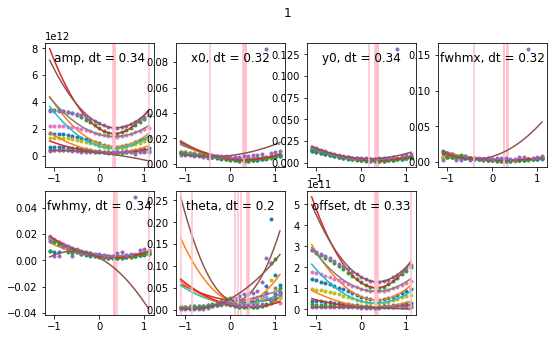

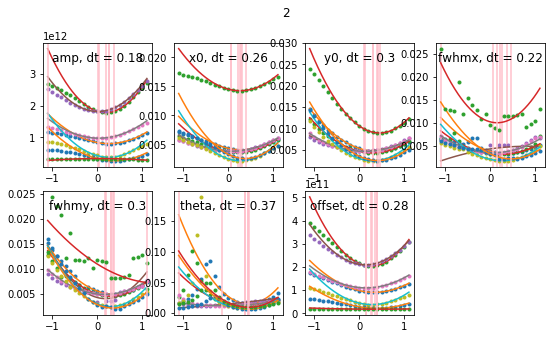

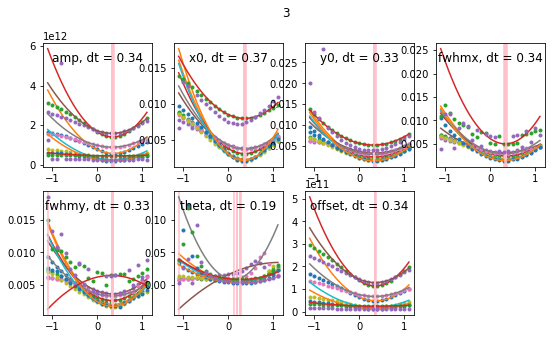

In [23]:
#Looking at minimum offsets from different dishes at a variety of frequencies
#vertical lines represent minimum for each frequency
#reported dt on plot is median of offsets of range of test frequencies

pars = ['amp', 'x0', 'y0', 'fwhmx', 'fwhmy', 'theta', 'offset']
freqlist = [10, 25, 50, 75, 100, 125, 150, 175]


for key in timing_fits_dish['FLY344'].keys():
    fig = plt.figure(figsize = (9,5))
    counter = 1
    for param in pars:
        ax = fig.add_subplot(2,4,counter)
        minfitlist = []
        for i in range(len(freqlist)):
            try:
                ax.plot(list(timedicts['FLY344'].keys()),timing_fits_dish['FLY344'][key][freqlist[i]][param],'.')
                minindx = timing_fits_dish['FLY344'][key][freqlist[i]]['x0'].index(np.min(timing_fits_dish['FLY344'][key][freqlist[i]]['x0']))
    #             minindx = fits[key][1]['x0'].index(np.min(fits[key][1]['x0']))

                a = np.polyfit(list(timedicts['FLY344'].keys()),timing_fits_dish['FLY344'][key][freqlist[i]][param],2)
                popt, pcov = curve_fit(xsquaredfit,list(timedicts['FLY344'].keys())[minindx-5:minindx+5],\
                                   timing_fits_dish['FLY344'][key][freqlist[i]][param][minindx-5:minindx+5], p0=(a[0],-0.5,a[1],a[2]))
                ax.plot(xs,xsquaredfit(xs,*popt))
                minfit = xs[list(xsquaredfit(xs,*popt)).index(np.min(xsquaredfit(xs,*popt)))]
                minfitlist.append(minfit)
                ax.axvline(minfit, color = 'pink')
            except: pass
        ax.set_title(param + ', dt = '+str(round(np.median(minfitlist),2)), y=0.8)
        counter+=1
    plt.suptitle(key)
    plt.show()

/home/erk26/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


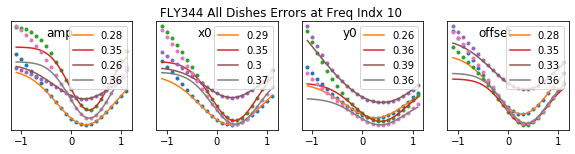

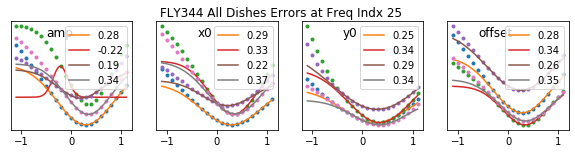

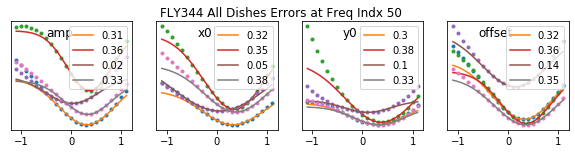

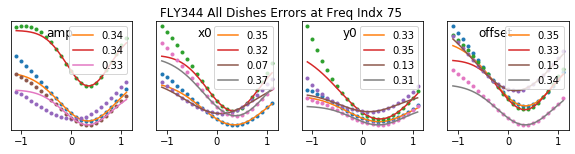

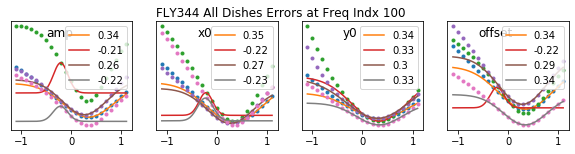

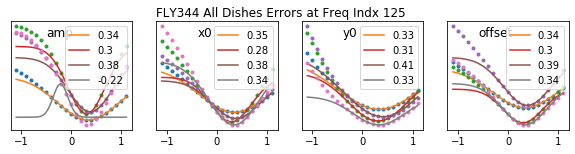

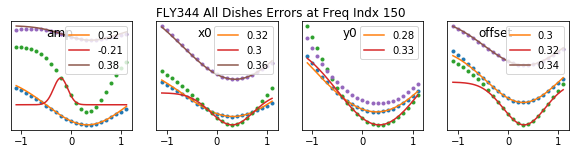

In [24]:
#show how offsets vary by dish at each frequency
timeoffsets = [round(i,1) for i in np.arange(-1.1,1.2,0.1)]

pars = ['amp', 'x0', 'y0','offset']
colors = ['pink', 'purple', 'blue', 'green']
freqlist = [10, 25, 50, 75, 100, 125, 150]

def Gauss(x,a,x0,sigma,k):
    return a*np.exp(-(x-x0)**2.0/(2.0*sigma**2.0))+k

xs = np.linspace(-1.1,1.1,200)

flight = 'FLY344'

for freq in freqlist:
    fig = plt.figure(figsize = (10,2))
    counter = 1
    for param in pars:
        for key in np.arange(4):
            ax = fig.add_subplot(1,4,counter)
            try:
                minindx = timing_fits_dish[flight][key][freq][param].index(np.min(timing_fits_dish[flight][key][freq][param]))
                minerror = timeoffsets[minindx]
                ax.plot(timeoffsets,timing_fits_dish[flight][key][freq][param],'.')
                popt, pcov = curve_fit(Gauss,timeoffsets[minindx-5:minindx+5],\
                                   timing_fits_dish[flight][key][freq][param][minindx-5:minindx+5], \
                                       p0=(timing_fits_dish[flight][key][freq][param][10],0.5,1,\
                                           timing_fits_dish[flight][key][freq][param][10]))
                ax.plot(xs,Gauss(xs,*popt), label = round(popt[1],2))
                minfit = xs[list(xsquaredfit(xs,*popt)).index(np.min(xsquaredfit(xs,*popt)))]
    #             ax.axvline(0, color = 'pink')
            except: pass
            ax.legend(loc = 'upper right')
#             ax.set_axis_off()
            ax.set_yticks([])
            ax.set_title(param, x = 0.4, y=0.8)
        counter+=1
    plt.suptitle(flight + " All Dishes Errors at Freq Indx " + str(freq))
    plt.show()



/home/erk26/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


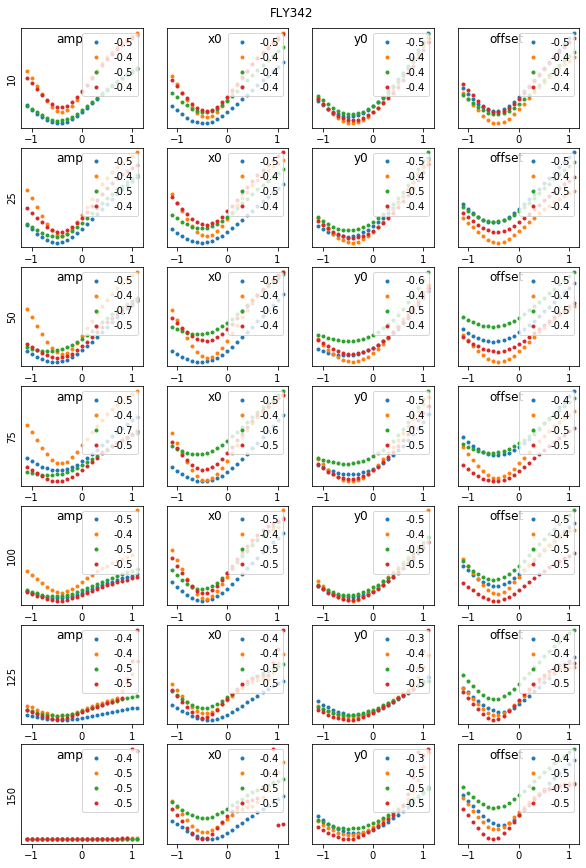

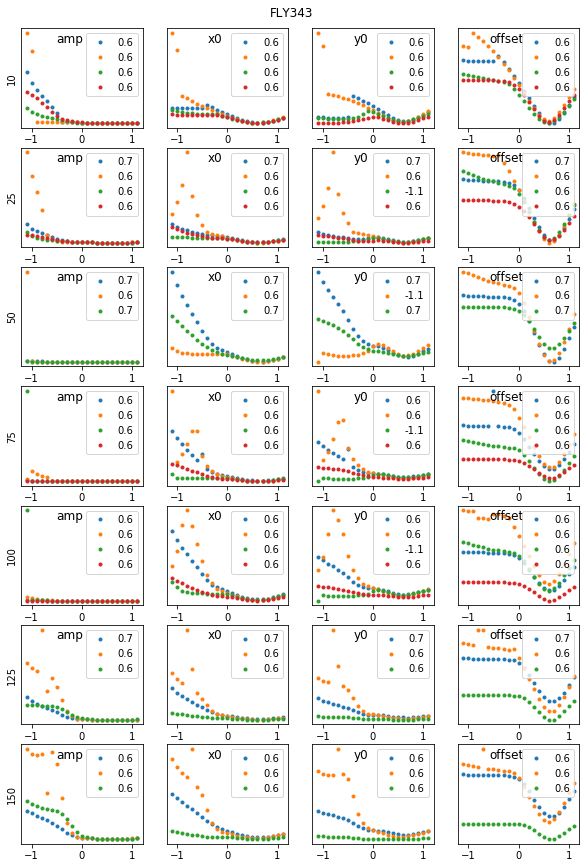

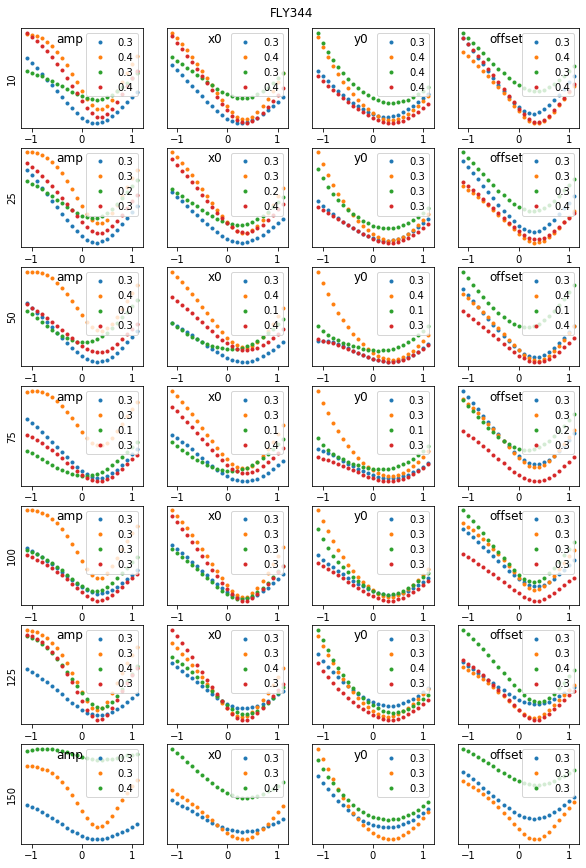

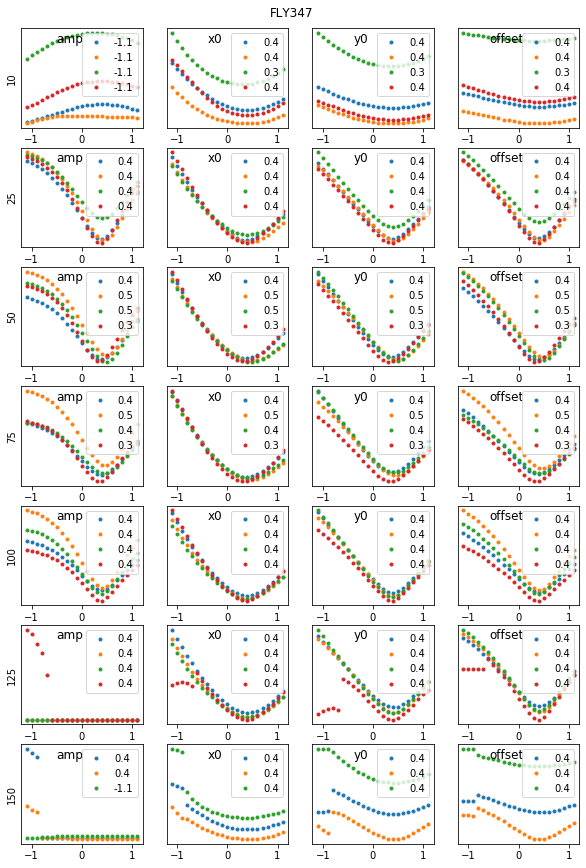

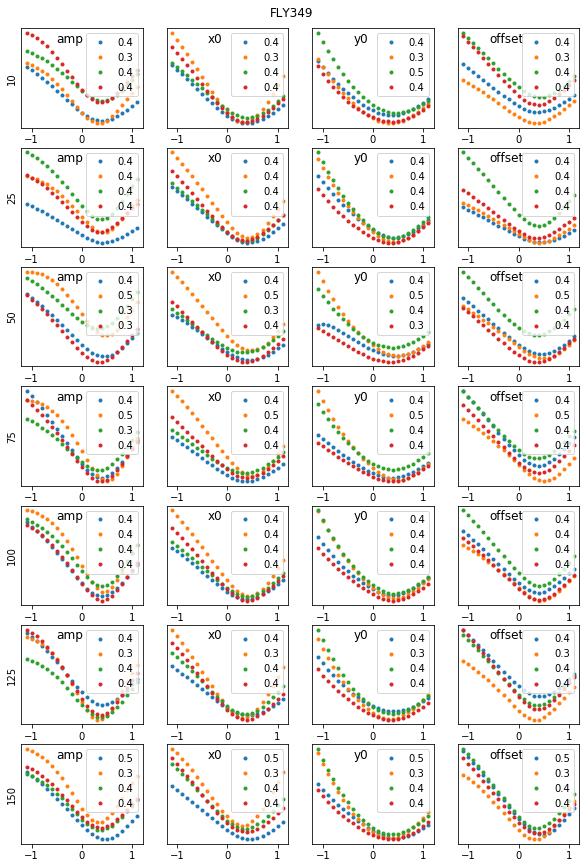

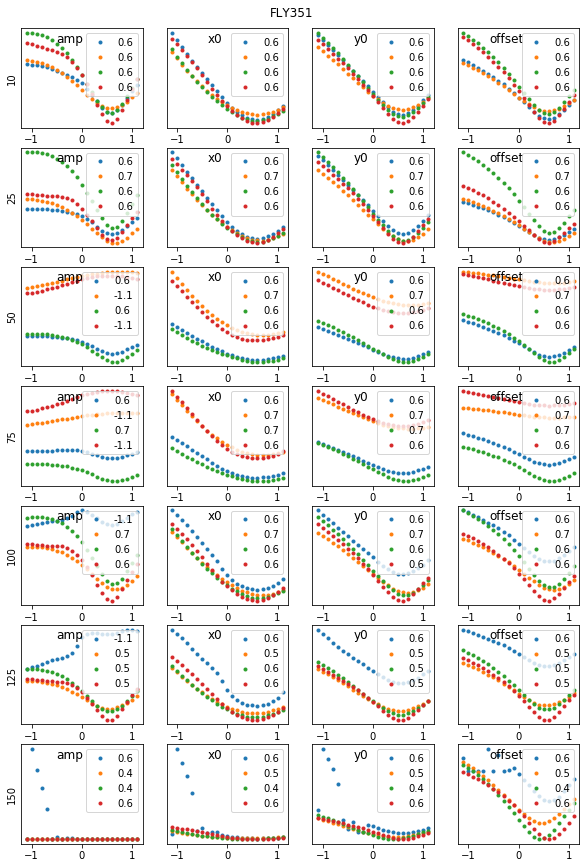

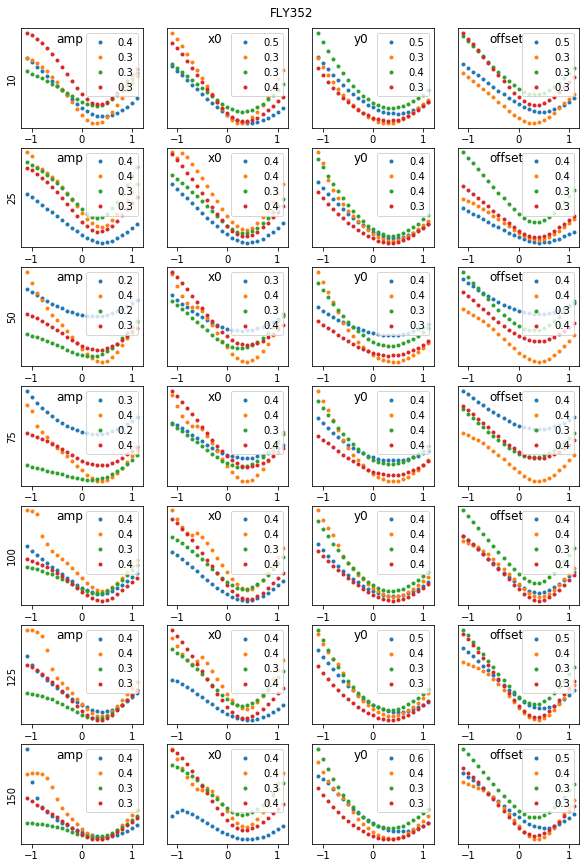

In [25]:
for flight in timing_fits_dish.keys():
    fig = plt.figure(figsize = (10,15))

    counter = 1
    for freq in freqlist:
        for param in pars:
            for key in np.arange(4):
                ax = fig.add_subplot(7,4,counter)
                try:
                    minindx = timing_fits_dish[flight][key][freq][param].index(np.min(timing_fits_dish[flight][key][freq][param]))
                    minerror = timeoffsets[minindx]
                    ax.plot(timeoffsets,timing_fits_dish[flight][key][freq][param],'.', label = minerror)

                    popt, pcov = curve_fit(Gauss,list(timedicts[flight].keys())[minindx-5:minindx+5],\
                                       timing_fits_dish[key][freq][param][minindx-5:minindx+5], \
                                           p0=(timing_fits_dish[flight][key][freq][param][10],0.5,1,\
                                               timing_fits_dish[flight][key][freq][param][10]))
        #             ax.plot(xs,xsquaredfit(xs,*popt))
                    minfit = xs[list(xsquaredfit(xs,*popt)).index(np.min(xsquaredfit(xs,*popt)))]
        #             ax.axvline(0, color = 'pink')
                except: pass
                ax.legend(loc = 'upper right')
    #             ax.set_axis_off()
                ax.set_yticks([])
                ax.set_title(param, x = 0.4, y=0.8)
                if counter in [1+n*4 for n in range(7)]: ax.set_ylabel(freq)
            counter+=1
    plt.suptitle(flight, y=0.9)
    plt.show()

Text(0.5, 0.9, 'Old v New Drone Data, Dish0 @ Freq Indx 30')

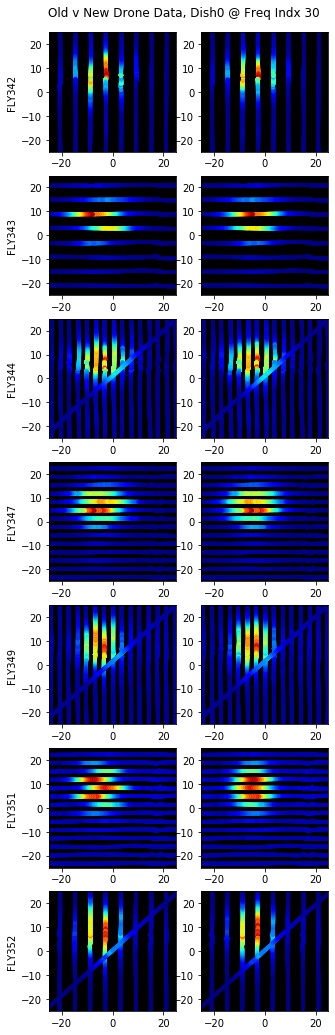

In [26]:
# plotted here in lin units, i usually plot in log
#this makes offset corrections even easier to visualize

fig = plt.figure(figsize = (5,18))
counter = 1
for key in timedicts.keys():
    ax = fig.add_subplot(7,2,counter)
    x = timedicts[key][0].fulldict['x']
    y = timedicts[key][0].fulldict['y']
    power = timedicts[key][0].fulldict['autos'][0,:,30]
    ax.scatter(x, y, c = (power), cmap = 'jet', marker = '.')
    ax.set_ylabel(timedicts[key][0].fulldict['FLY'])
    ax.set_facecolor('xkcd:black')
    ax.set_xlim(-25,25)
    ax.set_ylim(-25,25)

    counter+=1
    
    ax = fig.add_subplot(7,2,counter)
    x = timedicts[key][minindxdict[key]].fulldict['x']
    y = timedicts[key][minindxdict[key]].fulldict['y']
    power = timedicts[key][minindxdict[key]].fulldict['autos'][0,:,30]
    ax.scatter(x, y, c = (power), cmap = 'jet', marker = '.')    
    ax.set_facecolor('xkcd:black')
    ax.set_xlim(-25,25)
    ax.set_ylim(-25,25)
    counter+=1
plt.suptitle('Old v New Drone Data, Dish0 @ Freq Indx 30', y=0.9)


Text(0.5, 0.98, 'FLY344 Time Adjust')

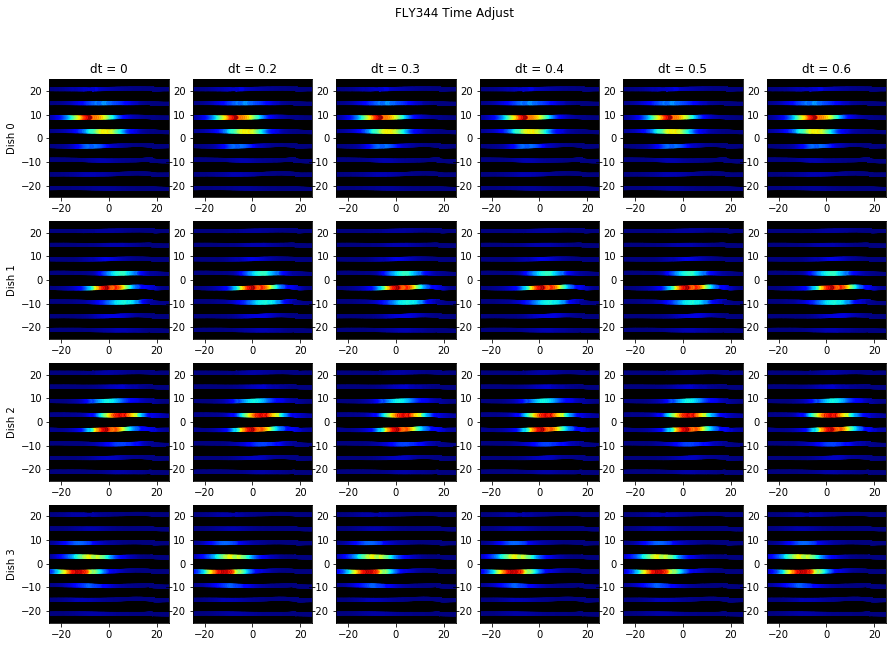

In [27]:
fig = plt.figure(figsize = (15,10))
counter = 1

key = 'FLY343'
for j in range(4):
    for indx in [0,0.2,0.3,0.4,0.5,0.6]:
        ax = fig.add_subplot(4,6,counter)
        x = timedicts[key][indx].fulldict['x']
        y = timedicts[key][indx].fulldict['y']
        power = timedicts[key][indx].fulldict['autos'][j,:,30]
        ax.scatter(x, y, c = (power), cmap = 'jet', marker = '.')
        ax.set_facecolor('xkcd:black')
        ax.set_xlim(-25,25)
        ax.set_ylim(-25,25)
        if j == 0: ax.set_title('dt = '+str(indx))
        if indx == 0:ax.set_ylabel('Dish '+str(j))
        counter+=1
    
plt.suptitle('FLY344 Time Adjust')